# Benchmarking: GPU vs CPU (UMAP and HDBSCAN)

## Figure generation

---

Author: Jianheng Liu @ Rui Zhang's Lab, SYSU, China

Email: jhfoxliu@gmail.com

Date: Jan, 2022

## Packages

- Python==3.7.8
- numpy==1.20.0
- scipy==1.5.1 or 1.7.3
- umap-learn==0.5.2
- sklearn==0.23.1
- matplotlib==3.2.2
- seaborn==0.10.1
- hdbscan==0.8.27

In [1]:
import time
import sys, os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats

# for Linux only, load font file
mpl.font_manager.fontManager.addfont("./arial.ttf")

# configure matplotlib
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42

## Load tables

In [2]:
df_UMAP_CPU = pd.read_csv("UMAP_CPU_test.csv", index_col=0)
df_UMAP_GPU = pd.read_csv("UMAP_GPU_test.csv", index_col=0)

In [3]:
df_UMAP = pd.concat([df_UMAP_CPU, df_UMAP_GPU])
df_UMAP = df_UMAP[df_UMAP["Time (sec)"] != -1]
df_UMAP["Time (min)"] = df_UMAP["Time (sec)"] / 60.0
print(df_UMAP)

      Scale  Replicate  Time (sec) Method  Time (min)
0      1000          0    8.235026    CPU    0.137250
1      1000          1    3.649276    CPU    0.060821
2      1000          2    3.495377    CPU    0.058256
3     10000          0  174.221058    CPU    2.903684
4     10000          1   26.401221    CPU    0.440020
5     10000          2   26.317261    CPU    0.438621
6     50000          0   63.822102    CPU    1.063702
7     50000          1   63.723706    CPU    1.062062
8     50000          2   63.012983    CPU    1.050216
9    100000          0  129.518017    CPU    2.158634
10   100000          1  130.209161    CPU    2.170153
11   100000          2  131.516321    CPU    2.191939
12   250000          0  328.845931    CPU    5.480766
13   250000          1  331.162078    CPU    5.519368
14   250000          2  331.113665    CPU    5.518561
15   500000          0  697.810257    CPU   11.630171
16   500000          1  704.153163    CPU   11.735886
17   500000          2  706.

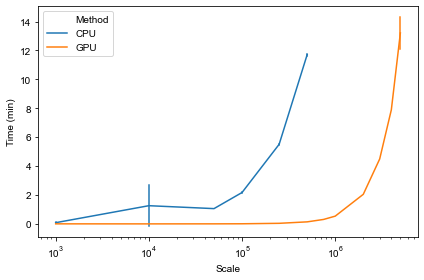

In [4]:
fig, ax = plt.subplots()
lineplot=sns.lineplot(
    data=df_UMAP, x="Scale", y="Time (min)", hue="Method", err_style="bars", ci="sd"
)
ax.set_xscale("log")
# ax.set_yscale("log")
plt.tight_layout()
plt.savefig("UMAP_CPU_vs_GPU.pdf")

In [5]:
df_HDBSCAN_CPU = pd.read_csv("HDBSCAN_CPU_test.csv")
df_HDBSCAN_GPU = pd.read_csv("HDBSCAN_GPU_test.csv")

In [6]:
df_HDBSCAN = pd.concat([df_HDBSCAN_CPU, df_HDBSCAN_GPU])
df_HDBSCAN = df_HDBSCAN[df_HDBSCAN["Time (sec)"] != -1]
df_HDBSCAN["Time (min)"] = df_HDBSCAN["Time (sec)"] / 60.0

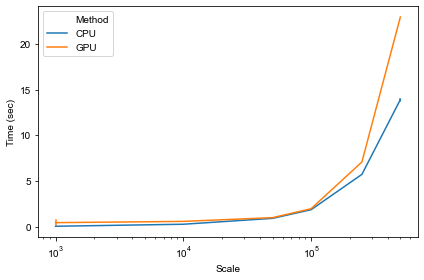

In [7]:
fig, ax = plt.subplots()
lineplot=sns.lineplot(
    data=df_HDBSCAN, x="Scale", y="Time (sec)", hue="Method", err_style="bars", ci="sd"
)
ax.set_xscale("log")
plt.tight_layout()
plt.savefig("HDBSCAN_CPU_vs_GPU.pdf")